In [1]:
import yaml
import torch
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

class DotDict(dict):     
    """dot.notation access to dictionary attributes"""      
    def __getattr__(*args):         
        val = dict.get(*args)        
        return DotDict(val) if type(val) is dict else val              
    __setattr__ = dict.__setitem__     
    __delattr__ = dict.__delitem__


with open("./config/config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)

config = DotDict(config)

## Comparison num_expressions in RL

In [43]:
nums = [str(i) for i in range(1, 6)]
data = {}
interesting_data = ['scores', 'max_scores']

for num in nums:
    a = torch.load('outputs/rl_'+num+'_000/model_200000.pt', map_location='cpu')
    for col in interesting_data:
        data[col] = data.get(col, []) + a[col]
    data['num_expressions'] = data.get('num_expressions', []) + [num for _ in range(len(a['scores']))]
    data['Episode'] = data.get('Episode', []) + [i*100 for i in range(1, len(a['scores']) + 1)]

df = pd.DataFrame(data)
# Do a MA to see something
window_size = 50
for col in interesting_data:
    df[col] = df.groupby('num_expressions')[col].transform(lambda s: s.rolling(window_size).mean())
fig = px.line(df, x='Episode', y="scores", color='num_expressions')
fig.show()

In [25]:
a = torch.load('outputs/rl_3_000/model_200000.pt', map_location='cpu')

In [39]:
df = pd.DataFrame({'scores': a['scores']})
df['scores'].rolling(10).mean().head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     0.626408
10    0.634411
11    0.641381
12    0.643194
13    0.644228
14    0.652321
15    0.657041
16    0.655755
17    0.654941
18    0.658778
19    0.649044
Name: scores, dtype: float64

In [2]:
from scripts.dclasses import Dataset
from scripts.language import Language
from pytorch_lightning.utilities.seed import seed_everything

seed_everything(69)

n_functions = 500
language = Language(config.Language)
data = Dataset(n_functions, language)

Global seed set to 69


In [4]:
print(language.const_index)
for row in data:
    print(row['Target Expression'].to_sympy())

16
x1*(x1 + 2.17492209947703*log(x2*(1 - x1)))
x1 + x2 + sin(x2**4*x3**5)
x2*(x2 - x3)
-x2/(x1 - 2.8937027402537*x2**2)
2.52023597443944*(0.629911296387309*x1**2*x3 + (x1**2 + x1*x2 + x2)**2)**2/x1**4
x1 - x2
x1 + x2**2
1/(x1 + x3)
x3*(x2 + cos(x1 + x3))
0.123056145096697*log(x2) + 5.2947276001971
x2 + cos(x1 + x3)
sin(0.703145965340325*sqrt(x1))
1.94460216715773*x2**3
x1*(x3 + cos(x3**2))
3.43274743823896*x1**3
5.79197154753318/(x3*(x2 + x3 + 1))
x2 + 1 + 2.57311467134094*(x1 + x3)**2/x2
x1 + x3
2.75149977675689*sin(log(x2))
x2 - log(x2) - 0.381059908345013/x3**3
x1 + x2
sin(x1)
cos(3.98561175946352*x2)
x1 + x3
3.74969178044870
(x1*(x1 + x3) + 0.321889061261089)/(x1*(0.0242615427082793*x2 + 2.00167330867351))
0.0430400855103887*log(x2) + 0.0204863832241294
x2 - 1.85667531135202*cos(3.17950989522648*x1)
x1*x3
cos(x1/x3)
5.55270220783333*x1**2
-sqrt(x1**2 + x2*x3) + cos(x3**3)
-x1*(x1 + x3)/(x1*(x1 + x3) - x2)
x1 + x3
4.03722441509643*(log(cos(x3)) + 1.50997662318345)/(x1 + x3**3)
1/x2


x2 + 4.701867968169/(x1**4 + x1**2 + 1/x2)
4.35798714236489*log(x2)
x1 + x2*x3 + x2
x1*x3 + x2 + (x1*(x1 + x2) - x2)**2
x1 + x2
x2**2
x2**4
(x2 + sin(x1)**4)*(x1*(x2 + x3)*log(x2) + 1)/(x2 + x3)
-1/(x2*(4.42222797060338*x2 - 1))
x1*x3
1.26277195349278*sin(x1)
x2**4 + 5.02352060507851
1/(x1 + 2.82620533812105)
x2*x3/(x1*(x2 + 1))
(x1**2 + x2**2 - cos(x2) - 0.830394639970126)/x2
x1 + x2**4 + x3
x1 + x2
1.0448017423465*sin(x1 + 0.0197059848780376*log(x3) + 0.0319143886749573)
1.07848471516928*cos(x2)
x1*(x1 + x2)*(x1**2 - x2) + x2 + x3
1.27502702270082*x1**2
x1*x3
x2 + 1 + x3/x2
x2*(x1*x3*(x2*x3 + 1) + 0.169559623845694)/x3
3.44880223969565/x3
x2*x3
(-x1 + (x1 - x2)*(x1 - 1.23254569900016*sin(x1 + 3.18353832658349)))/(x1 - x2)
x2 + x3
2.73687364782866*sqrt(x3)
x2 + log(log(x3)) + 1.45895215767841
(-exp(1.09694384708763*x1) + cos(x1 + 0.722817185746416) - 3.32503472774333)/x3**2
x1/x2
0.231270341572552/x2
x1 - x2
cos(x3)
(x1 - x3)/x3
x2*(x2 - x3*sin(1.35690496194704*x1**2))
sqrt(x1 + (x1 +

In [27]:
from scripts.expression import Expression
from scripts.model import ETIN_model
import torch
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



'''

HACER QUE TE CREE LA EXPRESIÓN DE OTRA MANERA:

    . En cambio de coger un valor probabilísticamente, coger el máximo con cierta probabilidad
      y con otra probabilidad coger un valor aleatorio del vector según probabilidades.

'''

# path = '/home/gridsan/amorenas/ETIN3/outputs/rl/model_80000.pt'
path = None

def nrmse(y_pred, y_true):
    std_y = np.std(y_true)
    nrmse = np.sqrt(np.mean((y_pred - y_true)**2)) / std_y
    return nrmse, 5 / (1 + nrmse)

if path is None:
    etin_model = ETIN_model(config.Model, language.info_for_model)
else:
    etin_model = ETIN_model.load_from_checkpoint(path, cfg=config.Model, info_for_model=language.info_for_model)

etin_model.to(device)
errors = []
rewards = []
for i, row in enumerate(data):
    new_expr = Expression(language, model=etin_model, prev_info=row)
    if i == 5:
        print(row['Target Expression'].to_sympy())
        print(new_expr.to_sympy())
        a = bbb
    y_pred = new_expr.evaluate(row['X'])
    if (np.isnan(y_pred).any() or np.abs(y_pred).max() > 1e5 or np.abs(y_pred).min() < 1e-2):
        continue
    error, reward = nrmse(y_pred, row['y'])
    errors.append(error)
    rewards.append(reward)

print(np.mean(errors), np.mean(rewards))

x1 - x2
exp(x1*(x2 + sin(x1 + log(x2))) - x1 - cos(x3))


KeyboardInterrupt: 

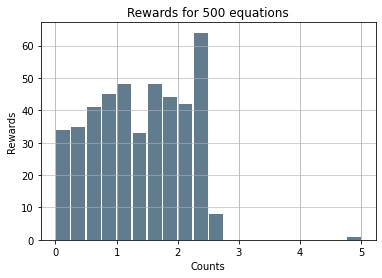

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate data on commute times.
rewards_series = pd.Series(rewards)

rewards_series.plot.hist(grid=True, bins=20, rwidth=0.9,
                         color='#607c8e')
plt.title('Rewards for 500 equations')
plt.xlabel('Counts')
plt.ylabel('Rewards')
plt.grid(axis='y', alpha=0.75)